In [87]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import talib

In [255]:
def create_datetime_features(df, datetime_column):   
    df['dayofmonth'] = df[datetime_column].dt.day
    df['dayofweek'] = df[datetime_column].dt.dayofweek
    df['hour'] = df[datetime_column].dt.hour
    df['minute'] = df[datetime_column].dt.minute
    return df

In [289]:
def getData(stockName,period='240d',interval='1h'):
    return yf.download(tickers=stockName, period=period, interval=interval)

In [290]:
df = getData('GARAN.IS').reset_index()

[*********************100%***********************]  1 of 1 completed


In [291]:
df['pct']=df['Close'].pct_change()
df['label']=np.where(df['pct']>0,1,0)
df['Datetime']=df['Datetime'] + pd.Timedelta(minutes=30)

In [292]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,pct,label
0,2022-07-13 10:00:00+03:00,14.100000,14.100000,13.880000,13.910000,13.910000,0,NaN,0
1,2022-07-13 11:00:00+03:00,13.900000,13.920000,13.850000,13.880000,13.880000,5125429,-0.002157,0
2,2022-07-13 12:00:00+03:00,13.870000,13.910000,13.860000,13.880000,13.880000,3932805,0.000000,0
3,2022-07-13 13:00:00+03:00,13.870000,13.910000,13.860000,13.900000,13.900000,1891760,0.001441,1
4,2022-07-13 14:00:00+03:00,13.900000,13.900000,13.830000,13.850000,13.850000,4803399,-0.003597,0
...,...,...,...,...,...,...,...,...,...
2038,2023-06-26 14:00:00+03:00,32.580002,32.720001,32.459999,32.619999,32.619999,2797418,0.001228,1
2039,2023-06-26 15:00:00+03:00,32.599998,32.639999,32.500000,32.540001,32.540001,2796317,-0.002452,0
2040,2023-06-26 16:00:00+03:00,32.540001,32.660000,32.500000,32.580002,32.580002,5053249,0.001229,1
2041,2023-06-26 17:00:00+03:00,32.599998,32.740002,32.480000,32.660000,32.660000,7923277,0.002455,1


# Feature Creation

## Date Features

In [293]:
df = create_datetime_features(df,'Datetime')
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,pct,label,dayofmonth,dayofweek,hour,minute
0,2022-07-13 10:00:00+03:00,14.100000,14.100000,13.880000,13.910000,13.910000,0,NaN,0,13,2,10,0
1,2022-07-13 11:00:00+03:00,13.900000,13.920000,13.850000,13.880000,13.880000,5125429,-0.002157,0,13,2,11,0
2,2022-07-13 12:00:00+03:00,13.870000,13.910000,13.860000,13.880000,13.880000,3932805,0.000000,0,13,2,12,0
3,2022-07-13 13:00:00+03:00,13.870000,13.910000,13.860000,13.900000,13.900000,1891760,0.001441,1,13,2,13,0
4,2022-07-13 14:00:00+03:00,13.900000,13.900000,13.830000,13.850000,13.850000,4803399,-0.003597,0,13,2,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,2023-06-26 14:00:00+03:00,32.580002,32.720001,32.459999,32.619999,32.619999,2797418,0.001228,1,26,0,14,0
2039,2023-06-26 15:00:00+03:00,32.599998,32.639999,32.500000,32.540001,32.540001,2796317,-0.002452,0,26,0,15,0
2040,2023-06-26 16:00:00+03:00,32.540001,32.660000,32.500000,32.580002,32.580002,5053249,0.001229,1,26,0,16,0
2041,2023-06-26 17:00:00+03:00,32.599998,32.740002,32.480000,32.660000,32.660000,7923277,0.002455,1,26,0,17,0


## Moving Average

In [294]:
for c in ['Close','High','Low','Open']:
    for i in [3,7,8,9,12,15,21]:
        df[f'SMA_{i}_{c}'] = talib.SMA(df[c], timeperiod=i)
        df[f'KAMA_{i}_{c}'] = talib.SMA(df[c], timeperiod=i)

## Price Above-Under MA 

## MA Intersection

## RSI

In [295]:
for r in [8,10,12,14]:
    df[f'RSI_{r}'] = talib.RSI(df['Close'], timeperiod=r)
    df[f'RSI_{r}_above']=np.where(df[f'RSI_{r}']>=70,1,0)
    df[f'RSI_{r}_under']=np.where(df[f'RSI_{r}']<=30,1,0)

## MACD

## ATR

In [296]:
for a in [8,10,12,14]:
    df[f'ATR_{a}'] = talib.ATR(df['High'],df['Low'], df['Close'],timeperiod=a)

# Modeling

In [297]:
for j in list(df.columns):
    for x in [3]:
        df[f'{j}_lag_{x}']=df[j].shift(x)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23220\724022184.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{j}_lag_{x}']=df[j].shift(x)
C:\Users\DELL\AppData\Local\Temp\ipykernel_23220\724022184.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{j}_lag_{x}']=df[j].shift(x)
C:\Users\DELL\AppData\Local\Temp\ipykernel_23220\724022184.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [298]:
import lightgbm as lgb

In [299]:
df = df.dropna()
df= df.drop(columns=['Volume','Adj Close','Datetime','Datetime_lag_3','pct'])

In [300]:
df

,Open,High,Low,Close,label,dayofmonth,dayofweek,hour,minute,SMA_3_Close,...,RSI_12_lag_3,RSI_12_above_lag_3,RSI_12_under_lag_3,RSI_14_lag_3,RSI_14_above_lag_3,RSI_14_under_lag_3,ATR_8_lag_3,ATR_10_lag_3,ATR_12_lag_3,ATR_14_lag_3
23,14.640000,14.810000,14.640000,14.710000,1,18,0,15,0,14.646667,...,79.113328,1.0,0.0,77.703126,1.0,0.0,0.194916,0.179971,0.169852,0.162203
24,14.710000,14.840000,14.700000,14.790000,1,18,0,16,0,14.713333,...,79.113328,1.0,0.0,77.703126,1.0,0.0,0.174301,0.164974,0.158198,0.152760
25,14.790000,14.830000,14.720000,14.780000,0,18,0,17,0,14.760000,...,80.392378,1.0,0.0,78.903814,1.0,0.0,0.161264,0.155477,0.150848,0.146848
26,14.780000,14.840000,14.770000,14.790000,1,18,0,18,0,14.786667,...,82.069354,1.0,0.0,80.487970,1.0,0.0,0.162356,0.156929,0.152444,0.148502
27,14.730000,14.800000,14.730000,14.750000,0,19,1,10,0,14.773333,...,83.797089,1.0,0.0,82.138732,1.0,0.0,0.159561,0.155236,0.151407,0.147895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,32.580002,32.720001,32.459999,32.619999,1,26,0,14,0,32.653333,...,70.335207,1.0,0.0,68.812905,0.0,0.0,0.662344,0.653824,0.645171,0.636558
2039,32.599998,32.639999,32.500000,32.540001,0,26,0,15,0,32.580001,...,69.598131,0.0,0.0,68.187548,0.0,0.0,0.597051,0.602441,0.603074,0.601089
2040,32.540001,32.660000,32.500000,32.580002,1,26,0,16,0,32.580001,...,66.192996,0.0,0.0,65.311308,0.0,0.0,0.557419,0.570197,0.576151,0.578154
2041,32.599998,32.740002,32.480000,32.660000,1,26,0,17,0,32.593334,...,66.589252,0.0,0.0,65.657961,0.0,0.0,0.520242,0.539178,0.549805,0.555429


In [301]:
fe_cols=[x for x in df.columns if "lag" in x]

In [302]:
X = df[fe_cols]
y = df['label']
#y2 = df['Close']

In [303]:
sl =int(round(len(df)*0.8))
X_train = X[:sl]
X_test = X[sl:]

y_train=y[:sl]
y_test=y[sl:]

In [304]:
model = lgb.LGBMClassifier()
model.fit(X_train,y_train)

LGBMClassifier()

In [305]:
pred = model.predict(X_test)

In [340]:
from sklearn.preprocessing import binarize
y_pred_binary = binarize(model.predict_proba(X_test), threshold=0.35)[:, 1]

In [341]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [342]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.57      0.39      0.46       219
           1       0.48      0.66      0.55       185

    accuracy                           0.51       404
   macro avg       0.53      0.52      0.51       404
weighted avg       0.53      0.51      0.50       404



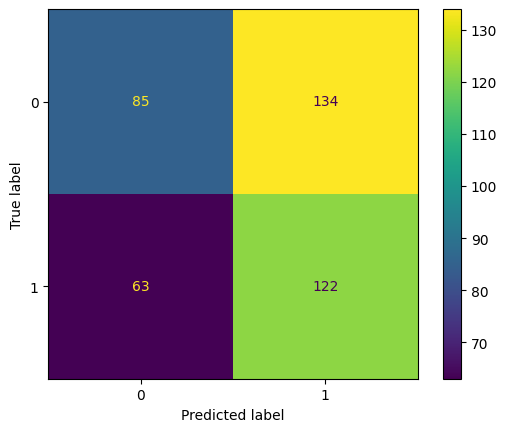

In [343]:
cm = confusion_matrix(y_test, y_pred_binary)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [339]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58       219
           1       0.46      0.38      0.42       185

    accuracy                           0.51       404
   macro avg       0.50      0.50      0.50       404
weighted avg       0.51      0.51      0.51       404



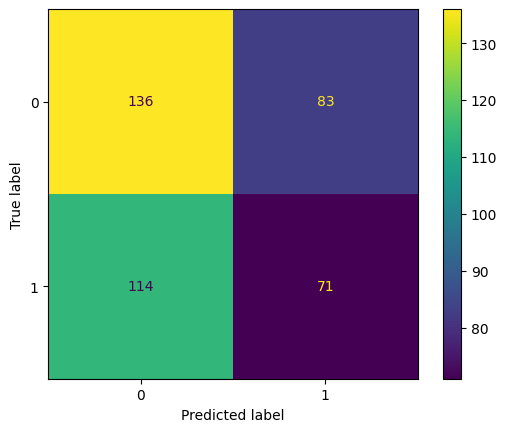

In [334]:
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [308]:
yt = y_test.to_frame().copy()
yt['pred']=y_pred

In [309]:
pd.DataFrame(model.feature_importances_,model.feature_name_).sort_values(by=0,ascending=False).head(20)

,0
Volume_lag_3,263
pct_lag_3,217
ATR_8_lag_3,151
RSI_8_lag_3,150
RSI_14_lag_3,146
ATR_14_lag_3,130
RSI_10_lag_3,130
RSI_12_lag_3,128
hour_lag_3,121
ATR_12_lag_3,116


In [310]:
yt

,label,pred
1639,0,1
1640,1,1
1641,1,0
1642,1,1
1643,0,1
...,...,...
2038,1,0
2039,0,1
2040,1,0
2041,1,1


In [288]:
X_test

,Open_lag_3,High_lag_3,Low_lag_3,Close_lag_3,Adj Close_lag_3,Volume_lag_3,pct_lag_3,label_lag_3,dayofmonth_lag_3,dayofweek_lag_3,...,RSI_12_lag_3,RSI_12_above_lag_3,RSI_12_under_lag_3,RSI_14_lag_3,RSI_14_above_lag_3,RSI_14_under_lag_3,ATR_8_lag_3,ATR_10_lag_3,ATR_12_lag_3,ATR_14_lag_3
815,23.959999,24.020000,23.820000,23.840000,23.840000,2565123.0,-0.005008,0.0,25.0,3.0,...,39.566911,0.0,0.0,38.314681,0.0,0.0,0.283009,0.287987,0.294639,0.302233
816,23.820000,23.860001,23.620001,23.820000,23.820000,5447096.0,-0.000839,0.0,25.0,3.0,...,38.984438,0.0,0.0,37.861039,0.0,0.0,0.277633,0.283189,0.290086,0.297788
817,23.820000,24.160000,23.780001,24.020000,24.020000,5081734.0,0.008396,1.0,25.0,3.0,...,47.427212,0.0,0.0,44.888041,0.0,0.0,0.290428,0.292870,0.297578,0.303660
818,24.160000,24.400000,24.059999,24.240000,24.240000,5836740.0,0.009159,1.0,26.0,4.0,...,54.913541,0.0,0.0,51.398745,0.0,0.0,0.301625,0.301583,0.304447,0.309113
819,24.240000,24.280001,24.000000,24.059999,24.059999,4738827.0,-0.007426,0.0,26.0,4.0,...,48.721055,0.0,0.0,46.552941,0.0,0.0,0.298922,0.299424,0.302410,0.307033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,32.820000,32.919998,32.740002,32.799999,32.799999,5238912.0,-0.000609,0.0,26.0,0.0,...,70.335207,1.0,0.0,68.812905,0.0,0.0,0.662344,0.653824,0.645171,0.636558
1009,32.779999,32.840000,32.700001,32.759998,32.759998,5563156.0,-0.001220,0.0,26.0,0.0,...,69.598131,0.0,0.0,68.187548,0.0,0.0,0.597051,0.602441,0.603074,0.601089
1010,32.779999,32.799999,32.520000,32.580002,32.580002,5528559.0,-0.005494,0.0,26.0,0.0,...,66.192996,0.0,0.0,65.311308,0.0,0.0,0.557419,0.570197,0.576151,0.578154
1011,32.580002,32.720001,32.459999,32.619999,32.619999,2797418.0,0.001228,1.0,26.0,0.0,...,66.589252,0.0,0.0,65.657961,0.0,0.0,0.520242,0.539178,0.549805,0.555429


In [315]:
from sklearn.preprocessing import binarize
y_pred_binary = binarize(model.predict_proba(X_test), threshold=0.65)[:, 1]

In [316]:
y_pred_binary


array([0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.